<a href="https://colab.research.google.com/github/hritikchaturvedi11/Sentiment-analysis-using-Bag-Of-Words-Model/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import data (test CSV)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

 #cd (change directory) to the file/folder location
 %cd '/content/drive/MyDrive/NLP Project'

/content/drive/MyDrive/NLP Project


In [6]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
from numpy import array
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from pandas import DataFrame
from matplotlib import pyplot


# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# turn a doc into clean tokens
def clean_doc(doc):
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
	table = str.maketrans('', '', string.punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# filter out stop words
	stop_words = set(stopwords.words('english'))
	tokens = [w for w in tokens if not w in stop_words]
	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]
	return tokens

# load the document
filename = 'txt_sentoken/pos/cv000_29590.txt'
text = load_doc(filename)
tokens = clean_doc(text)
print(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['films', 'adapted', 'comic', 'books', 'plenty', 'success', 'whether', 'theyre', 'superheroes', 'batman', 'superman', 'spawn', 'geared', 'toward', 'kids', 'casper', 'arthouse', 'crowd', 'ghost', 'world', 'theres', 'never', 'really', 'comic', 'book', 'like', 'hell', 'starters', 'created', 'alan', 'moore', 'eddie', 'campbell', 'brought', 'medium', 'whole', 'new', 'level', 'mid', 'series', 'called', 'watchmen', 'say', 'moore', 'campbell', 'thoroughly', 'researched', 'subject', 'jack', 'ripper', 'would', 'like', 'saying', 'michael', 'jackson', 'starting', 'look', 'little', 'odd', 'book', 'graphic', 'novel', 'pages', 'long', 'includes', 'nearly', 'consist', 'nothing', 'footnotes', 'words', 'dont', 'dismiss', 'film', 'source', 'get', 'past', 'whole', 'comic', 'book', 'thing', 'might', 'find', 'another', 'stumbling', 'block', 'hells', 'directors', 'albert', 'allen', 'hughes', 'gettin

In [7]:
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
 
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
# turn a doc into clean tokens
def clean_doc(doc):
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
	table = str.maketrans('', '', punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# filter out stop words
	stop_words = set(stopwords.words('english'))
	tokens = [w for w in tokens if not w in stop_words]
	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]
	return tokens
 
# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
	# load doc
	doc = load_doc(filename)
	# clean doc
	tokens = clean_doc(doc)
	# update counts
	vocab.update(tokens)
 
# load all docs in a directory
def process_docs(directory, vocab):
	# walk through all files in the folder
	for filename in listdir(directory):
		# skip any reviews in the test set
		if filename.startswith('cv9'):
			continue
		# create the full path of the file to open
		path = directory + '/' + filename
		# add doc to vocab
		add_doc_to_vocab(path, vocab)
 
# define vocab
vocab = Counter()
# add all docs to vocab
process_docs('txt_sentoken/pos', vocab)
process_docs('txt_sentoken/neg', vocab)
# print the size of the vocab
print(len(vocab))
# print the top words in the vocab
print(vocab.most_common(50))

44276
[('film', 7983), ('one', 4946), ('movie', 4826), ('like', 3201), ('even', 2262), ('good', 2080), ('time', 2041), ('story', 1907), ('films', 1873), ('would', 1844), ('much', 1824), ('also', 1757), ('characters', 1735), ('get', 1724), ('character', 1703), ('two', 1643), ('first', 1588), ('see', 1557), ('way', 1515), ('well', 1511), ('make', 1418), ('really', 1407), ('little', 1351), ('life', 1334), ('plot', 1288), ('people', 1269), ('could', 1248), ('bad', 1248), ('scene', 1241), ('movies', 1238), ('never', 1201), ('best', 1179), ('new', 1140), ('scenes', 1135), ('man', 1131), ('many', 1130), ('doesnt', 1118), ('know', 1092), ('dont', 1086), ('hes', 1024), ('great', 1014), ('another', 992), ('action', 985), ('love', 977), ('us', 967), ('go', 952), ('director', 948), ('end', 946), ('something', 945), ('still', 936)]


In [8]:
# keep tokens with a min occurrence
min_occurane = 2
tokens = [k for k,c in vocab.items() if c >= min_occurane]
print(len(tokens))

25767


In [10]:
# save list to file
def save_list(lines, filename):
	# convert lines to a single blob of text
	data = '\n'.join(lines)
	# open file
	file = open(filename, 'w')
	# write text
	file.write(data)
	# close file
	file.close()
 
# save tokens to a vocabulary file
save_list(tokens, 'vocab.txt')

In [15]:
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# turn a doc into clean tokens
def clean_doc(doc):
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
	table = str.maketrans('', '', punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# filter out stop words
	stop_words = set(stopwords.words('english'))
	tokens = [w for w in tokens if not w in stop_words]
	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]
	return tokens

# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
	# load the doc
	doc = load_doc(filename)
	# clean doc
	tokens = clean_doc(doc)
	# filter by vocab
	tokens = [w for w in tokens if w in vocab]
	return ' '.join(tokens)

# load all docs in a directory
def process_docs(directory, vocab, is_trian):
	lines = list()
	# walk through all files in the folder
	for filename in listdir(directory):
		# skip any reviews in the test set
		if is_trian and filename.startswith('cv9'):
			continue
		if not is_trian and not filename.startswith('cv9'):
			continue
		# create the full path of the file to open
		path = directory + '/' + filename
		# load and clean the doc
		line = doc_to_line(path, vocab)
		# add to list
		lines.append(line)
	return lines

# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

# load all training reviews
positive_lines = process_docs('txt_sentoken/pos', vocab, True)
negative_lines = process_docs('txt_sentoken/neg', vocab, True)

# create the tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on the documents
docs = negative_lines + positive_lines
tokenizer.fit_on_texts(docs)

# encode training data set
Xtrain = tokenizer.texts_to_matrix(docs, mode='freq')
print(Xtrain.shape)

# load all test reviews
positive_lines = process_docs('txt_sentoken/pos', vocab, False)
negative_lines = process_docs('txt_sentoken/neg', vocab, False)
docs = negative_lines + positive_lines
# encode training data set
Xtest = tokenizer.texts_to_matrix(docs, mode='freq')
print(Xtest.shape)

(1800, 25768)
(200, 25768)


In [16]:
n_words = Xtest.shape[1]

In [17]:
ytrain = array([0 for _ in range(900)] + [1 for _ in range(900)])
ytest = array([0 for _ in range(100)] + [1 for _ in range(100)])

In [18]:
# define network
model = Sequential()
model.add(Dense(50, input_shape=(n_words,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# fit network
model.fit(Xtrain, ytrain, epochs=50, verbose=2)

Epoch 1/50
57/57 - 1s - loss: 0.6909 - accuracy: 0.6194
Epoch 2/50
57/57 - 1s - loss: 0.6784 - accuracy: 0.8422
Epoch 3/50
57/57 - 1s - loss: 0.6558 - accuracy: 0.8672
Epoch 4/50
57/57 - 1s - loss: 0.6211 - accuracy: 0.9017
Epoch 5/50
57/57 - 1s - loss: 0.5765 - accuracy: 0.9183
Epoch 6/50
57/57 - 1s - loss: 0.5262 - accuracy: 0.9400
Epoch 7/50
57/57 - 1s - loss: 0.4745 - accuracy: 0.9483
Epoch 8/50
57/57 - 1s - loss: 0.4243 - accuracy: 0.9589
Epoch 9/50
57/57 - 1s - loss: 0.3786 - accuracy: 0.9578
Epoch 10/50
57/57 - 1s - loss: 0.3362 - accuracy: 0.9711
Epoch 11/50
57/57 - 1s - loss: 0.2984 - accuracy: 0.9739
Epoch 12/50
57/57 - 1s - loss: 0.2647 - accuracy: 0.9833
Epoch 13/50
57/57 - 1s - loss: 0.2355 - accuracy: 0.9850
Epoch 14/50
57/57 - 1s - loss: 0.2100 - accuracy: 0.9878
Epoch 15/50
57/57 - 1s - loss: 0.1869 - accuracy: 0.9906
Epoch 16/50
57/57 - 1s - loss: 0.1667 - accuracy: 0.9922
Epoch 17/50
57/57 - 1s - loss: 0.1495 - accuracy: 0.9928
Epoch 18/50
57/57 - 1s - loss: 0.1341 - 

In [23]:
# evaluate
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 89.999998


In [24]:
# prepare bag of words encoding of docs
def prepare_data(train_docs, test_docs, mode):
	# create the tokenizer
	tokenizer = Tokenizer()
	# fit the tokenizer on the documents
	tokenizer.fit_on_texts(train_docs)
	# encode training data set
	Xtrain = tokenizer.texts_to_matrix(train_docs, mode=mode)
	# encode training data set
	Xtest = tokenizer.texts_to_matrix(test_docs, mode=mode)
	return Xtrain, Xtest

In [25]:
# evaluate a neural network model
def evaluate_mode(Xtrain, ytrain, Xtest, ytest):
	scores = list()
	n_repeats = 30
	n_words = Xtest.shape[1]
	for i in range(n_repeats):
		# define network
		model = Sequential()
		model.add(Dense(50, input_shape=(n_words,), activation='relu'))
		model.add(Dense(1, activation='sigmoid'))
		# compile network
		model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
		# fit network
		model.fit(Xtrain, ytrain, epochs=50, verbose=2)
		# evaluate
		loss, acc = model.evaluate(Xtest, ytest, verbose=0)
		scores.append(acc)
		print('%d accuracy: %s' % ((i+1), acc))
	return scores

In [29]:
from numpy import array
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from pandas import DataFrame
from matplotlib import pyplot

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# turn a doc into clean tokens
def clean_doc(doc):
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
	table = str.maketrans('', '', punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# filter out stop words
	stop_words = set(stopwords.words('english'))
	tokens = [w for w in tokens if not w in stop_words]
	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]
	return tokens

# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
	# load the doc
	doc = load_doc(filename)
	# clean doc
	tokens = clean_doc(doc)
	# filter by vocab
	tokens = [w for w in tokens if w in vocab]
	return ' '.join(tokens)

# load all docs in a directory
def process_docs(directory, vocab, is_trian):
	lines = list()
	# walk through all files in the folder
	for filename in listdir(directory):
		# skip any reviews in the test set
		if is_trian and filename.startswith('cv9'):
			continue
		if not is_trian and not filename.startswith('cv9'):
			continue
		# create the full path of the file to open
		path = directory + '/' + filename
		# load and clean the doc
		line = doc_to_line(path, vocab)
		# add to list
		lines.append(line)
	return lines

# evaluate a neural network model
def evaluate_mode(Xtrain, ytrain, Xtest, ytest):
	scores = list()
	n_repeats = 30
	n_words = Xtest.shape[1]
	for i in range(n_repeats):
		# define network
		model = Sequential()
		model.add(Dense(50, input_shape=(n_words,), activation='relu'))
		model.add(Dense(1, activation='sigmoid'))
		# compile network
		model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
		# fit network
		model.fit(Xtrain, ytrain, epochs=50, verbose=2)
		# evaluate
		loss, acc = model.evaluate(Xtest, ytest, verbose=0)
		scores.append(acc)
		print('%d accuracy: %s' % ((i+1), acc))
	return scores

# prepare bag of words encoding of docs
def prepare_data(train_docs, test_docs, mode):
	# create the tokenizer
	tokenizer = Tokenizer()
	# fit the tokenizer on the documents
	tokenizer.fit_on_texts(train_docs)
	# encode training data set
	Xtrain = tokenizer.texts_to_matrix(train_docs, mode=mode)
	# encode training data set
	Xtest = tokenizer.texts_to_matrix(test_docs, mode=mode)
	return Xtrain, Xtest

# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)
# load all training reviews
positive_lines = process_docs('txt_sentoken/pos', vocab, True)
negative_lines = process_docs('txt_sentoken/neg', vocab, True)
train_docs = negative_lines + positive_lines
# load all test reviews
positive_lines = process_docs('txt_sentoken/pos', vocab, False)
negative_lines = process_docs('txt_sentoken/neg', vocab, False)
test_docs = negative_lines + positive_lines
# prepare labels
ytrain = array([0 for _ in range(900)] + [1 for _ in range(900)])
ytest = array([0 for _ in range(100)] + [1 for _ in range(100)])

mode = 'binary'
Xtrain, Xtest = prepare_data(train_docs, test_docs, mode)
# evaluate model on data for mode
results[mode] = evaluate_mode(Xtrain, ytrain, Xtest, ytest)

Epoch 1/50
57/57 - 1s - loss: 0.4636 - accuracy: 0.7911
Epoch 2/50
57/57 - 1s - loss: 0.0489 - accuracy: 0.9967
Epoch 3/50
57/57 - 1s - loss: 0.0155 - accuracy: 1.0000
Epoch 4/50
57/57 - 1s - loss: 0.0082 - accuracy: 1.0000
Epoch 5/50
57/57 - 1s - loss: 0.0049 - accuracy: 1.0000
Epoch 6/50
57/57 - 1s - loss: 0.0033 - accuracy: 1.0000
Epoch 7/50
57/57 - 1s - loss: 0.0023 - accuracy: 1.0000
Epoch 8/50
57/57 - 1s - loss: 0.0017 - accuracy: 1.0000
Epoch 9/50
57/57 - 1s - loss: 0.0013 - accuracy: 1.0000
Epoch 10/50
57/57 - 1s - loss: 0.0011 - accuracy: 1.0000
Epoch 11/50
57/57 - 1s - loss: 8.7229e-04 - accuracy: 1.0000
Epoch 12/50
57/57 - 1s - loss: 7.2312e-04 - accuracy: 1.0000
Epoch 13/50
57/57 - 1s - loss: 6.0817e-04 - accuracy: 1.0000
Epoch 14/50
57/57 - 1s - loss: 5.1835e-04 - accuracy: 1.0000
Epoch 15/50
57/57 - 1s - loss: 4.4666e-04 - accuracy: 1.0000
Epoch 16/50
57/57 - 1s - loss: 3.8868e-04 - accuracy: 1.0000
Epoch 17/50
57/57 - 1s - loss: 3.4057e-04 - accuracy: 1.0000
Epoch 18/50


          binary
count  30.000000
mean    0.917500
std     0.008174
min     0.900000
25%     0.915000
50%     0.920000
75%     0.920000
max     0.935000


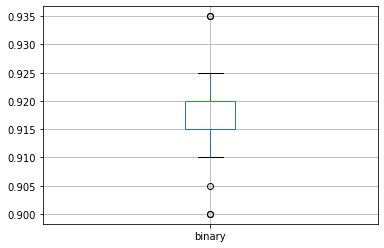

In [30]:
# summarize results
print(results.describe())
# plot results
results.boxplot()
pyplot.show()

In [31]:
# classify a review as negative (0) or positive (1)
def predict_sentiment(review, vocab, tokenizer, model):
	# clean
	tokens = clean_doc(review)
	# filter by vocab
	tokens = [w for w in tokens if w in vocab]
	# convert to line
	line = ' '.join(tokens)
	# encode
	encoded = tokenizer.texts_to_matrix([line], mode='freq')
	# prediction
	yhat = model.predict(encoded, verbose=0)
	return round(yhat[0,0])

In [33]:
# test positive text
text = 'Best movie ever!'
print(predict_sentiment(text, vocab, tokenizer, model))
# test negative text
text = 'This is a bad movie.'
print(predict_sentiment(text, vocab, tokenizer, model))

1
0


In [34]:
model.save('sentiment_analysis.h5')